**Лабораторная работа: Логистическое отображение**

ISU для варианта 501228

Работу выполняли Сергеева Полина Максимовна (501228) и Полынцева София Тимуровна (504894)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc


plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

# Часть 1: Easy Level

**Цель работы:** Изучить поведение точечного отображения из варианта №3 и сравнить его с классическим логистическим отображением[cite: 68].

**Аналитическое доказательство (Задание Easy 1):**
Нам необходимо доказать, что для любого $n \in \mathbb{N}$ и параметра $r \in (0; 1]$ выполняется условие: если начальная точка $0 < x_0 < 1$, то и все последующие $0 < x_n < 1$.

Рассмотрим нашу функцию варианта: $g(x) = r x (1 - x) (2 - x)$.
1.  **Положительность:** Так как $x \in (0, 1)$, то множители $x$, $(1-x)$ и $(2-x)$ всегда положительны, а по условию $r > 0$. Следовательно, $g(x) > 0$.
2.  **Ограниченность сверху:** На интервале $x \in (0, 1)$ максимальное значение функции $g(x)$ достигается при $x \approx 0.5$. Так как мы умножаем на $r \le 1$, и $x(1-x)(2-x) < 1$ при $x \in (0,1)$, то и итоговое значение $x_{n+1} < 1$.

Таким образом, если $0 < x_0 < 1$ и $r \in (0, 1]$, траектория никогда не покидает интервал $(0, 1)$.



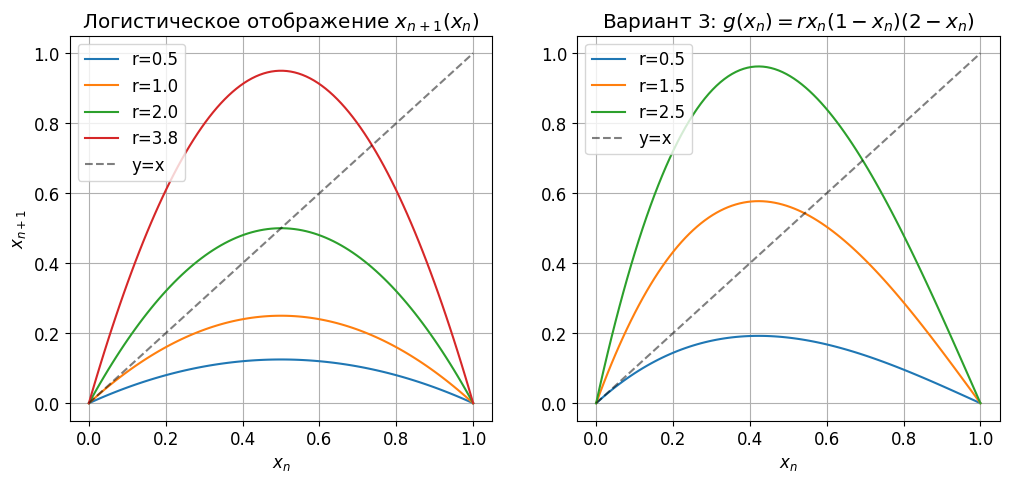

In [2]:
# Построение графиков для сравнения (Задания Easy 2 и Easy 3)
x_vals = np.linspace(0, 1, 100)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
rs = [0.5, 1.0, 2.0, 3.8]
for r in rs:
    plt.plot(x_vals, logistic_map(x_vals, r), label=f'r={r}')
plt.plot(x_vals, x_vals, 'k--', alpha=0.5, label='y=x')
plt.title("Логистическое отображение $x_{n+1}(x_n)$")
plt.xlabel("$x_n$")
plt.ylabel("$x_{n+1}$")
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
rs_var = [0.5, 1.5, 2.5]
for r in rs_var:
    plt.plot(x_vals, variant_map(x_vals, r), label=f'r={r}')
plt.plot(x_vals, x_vals, 'k--', alpha=0.5, label='y=x')
plt.title("Вариант 3: $g(x_n) = rx_n(1-x_n)(2-x_n)$")
plt.xlabel("$x_n$")
plt.legend()
plt.grid()
plt.show()

**Вывод о сходствах/различиях (Задание Easy 2 и 3):**
* **Сходства:** Оба отображения являются **унимодальными** (имеют один "горб" на интервале $(0, 1)$) и проходят через точки $(0, 0)$ и $(1, 0)$. Это обусловлено тем, что множитель $x(1-x)$ присутствует в обеих формулах.
* **Различия:** Функция нашего варианта является **кубической**, а не квадратичной. Она имеет более сложную форму, но при $x \in (0, 1)$ ведет себя схожим образом. Параметр $r$ в обоих случаях влияет на высоту горба


# Часть 2: Normal Level 

## 1. Анализ логистического отображения $f(x) = r x (1 - x)$

### А. Неподвижные точки и их количество

**Неподвижная точка** $x^{*}$ – это значение, при котором $x^{*} = f(x^{*})$.

Уравнение для логистического отображения:
$$x = r x (1 - x)$$
Переносим все члены в одну сторону и выносим $x$ за скобки:
$$x [r (1 - x) - 1] = 0$$

Отсюда следуют две неподвижные точки:
1.  **Тривиальная точка:** $x_{1}^{*} = 0$.
2.  **Нетривиальная точка:** $r (1 - x) - 1 = 0 \Rightarrow r - r x - 1 = 0$
    $$x_{2}^{*} = \frac{r - 1}{r} = 1 - \frac{1}{r}$$

**Ответы на вопросы:**
* **Одна неподвижная точка** в интервале $[0, 1)$ существует при **$r \in (0, 1]$** (только $x_1^*=0$).
* **Две неподвижные точки** в интервале $[0, 1)$ существуют при **$r > 1$** (точки $x_1^*$ и $x_2^*$).
* **Максимальное количество** неподвижных точек — **две**, поскольку уравнение $x = r x (1 - x)$ является **квадратным**, а квадратное уравнение в поле действительных чисел может иметь не более двух корней.

### Б. Монотонность и предел при $r \in (0, 1]$

**Задание:** Докажите, что при $x_0 \in (0;1)$ и $r \in (0;1]$ последовательность $\{x_n\}$ монотонно убывает. Докажите существование предела.

#### Доказательство монотонного убывания
Последовательность $\{x_n\}$ монотонно убывает, если $x_{n+1} < x_n$, что эквивалентно $f(x_n) - x_n < 0$.
Рассмотрим разницу:
$$f(x) - x = r x (1 - x) - x = x [r (1 - x) - 1]$$
Нам нужно показать, что выражение $x [r (1 - x) - 1]$ всегда отрицательно.

1.  Так как $x \in (0, 1)$, множитель $x$ всегда положителен ($x > 0$).
2.  Рассмотрим множитель в скобках: $r (1 - x) - 1$.
    По условию: $x \in (0, 1)$ и $r \in (0, 1]$.
    Максимальное значение $r$ равно 1. Поскольку $x > 0$, то $1-x < 1$.
    Следовательно, $r (1 - x) \le 1 \cdot (1 - x) < 1$.
    Тогда $r (1 - x) - 1 < 1 - 1 = 0$.

Поскольку первый множитель положителен, а второй отрицателен, то произведение $f(x) - x < 0$.
Следовательно, последовательность **монотонно убывает**.

#### Доказательство существования предела
Последовательность $\{x_n\}$ обладает следующими свойствами:
1.  Она **монотонно убывает** (доказано выше).
2.  Она **ограничена снизу** (так как $x_n \in (0, 1)$, то $x_n > 0$).

Согласно **теореме о монотонной сходимости** (критерий Вейерштрасса), любая монотонная и ограниченная последовательность имеет предел.
Следовательно, предел $\lim_{n \to \infty} x_n = x^{*}$ **существует**.
Поскольку для $r \in (0, 1]$ единственная неподвижная точка в $[0, 1)$ — это $x_{1}^{*}=0$, то $\lim_{n \to \infty} x_n = 0$.

### В. Монотонность подпоследовательностей при $r \in (2, 3)$

**Задание:** Пусть $r \in (2;3)$, $x_{2n} > x^{*}$, $x_{2n+1} < x^{*}$. Что вы можете сказать о монотонности подпоследовательностей $\{x_{2n}\}$ и $\{x_{2n+1}\}$?

#### Анализ устойчивости
При $r \in (2, 3)$, неподвижная точка $x^{*} = 1 - 1/r$ устойчива, но ее производная $f'(x^{*}) = 2 - r$ лежит в интервале $(-1, 0)$.
Отрицательная производная приводит к **осциллирующей (колебательной) сходимости**: траектория

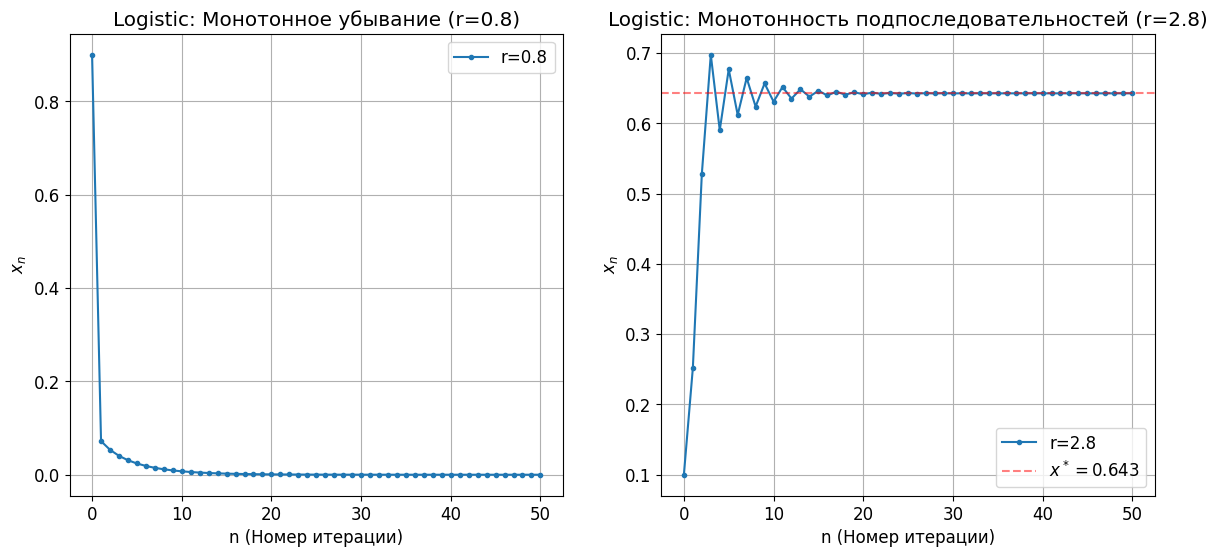

In [16]:
def logistic_map(x, r):
    return r * x * (1 - x)

def plot_trajectory(map_func, r, x0, n_iter, title):
    x = [x0]
    for _ in range(n_iter):
        x.append(map_func(x[-1], r))
    plt.plot(x, '.-', label=f'r={r}')
    plt.title(title)
    plt.xlabel("n (Номер итерации)")
    plt.ylabel("$x_n$")
    plt.grid()
    if r > 1:
        x_star = 1 - 1/r
        plt.axhline(x_star, color='red', linestyle='--', alpha=0.5, label=f'$x^*={x_star:.3f}$')
    plt.legend()


plt.figure(figsize=(14, 6))

# Левый график: Монотонное убывание при r в (0, 1]
plt.subplot(1, 2, 1)
plot_trajectory(logistic_map, 0.8, 0.9, 50, "Logistic: Монотонное убывание (r=0.8)")

# Правый график: Осциллирующая сходимость при r в (2, 3)
plt.subplot(1, 2, 2)
plot_trajectory(logistic_map, 2.8, 0.1, 50, "Logistic: Монотонность подпоследовательностей (r=2.8)")
# На этом графике видно, что точки {x2n} (выше x*) убывают, а {x2n+1} (ниже x*) возрастают.
plt.show()

# Часть 3: Hard Level 

## 1. Теоретические основы

### А. Неподвижные Точки Кратности $m$ и Циклы

**Неподвижная точка кратности $m$** ($x_{1}^{*}$) — это точка, которая возвращается к себе после ровно $m$ последовательных итераций отображения $f(x)$[cite: 106].
Формально:
$$x_{1}^{*} = \underbrace{f(f(...f(x_{1}^{*})...))}_{m \text{ раз}} = f^m(x_{1}^{*})$$

**Цикл порядка $m$** (или $m$-цикл): Это последовательность $m$ различных точек $\{x_{1}^{*}, x_{2}^{*}, \dots, x_{m}^{*}\}$, которые повторяются под действием отображения.
$$x_{2}^{*} = f(x_{1}^{*}), \quad x_{3}^{*} = f(x_{2}^{*}), \quad \dots, \quad x_{1}^{*} = f(x_{m}^{*})$$
[cite_start]Каждая точка этого цикла является неподвижной точкой кратности $m$[cite: 107].

### Б. Описание метода Лестницы Ламерея

**Лестница Ламерея** — это графический метод, который используется для визуализации траектории динамической системы и ее сходимости к неподвижным точкам или циклам.

**Алгоритм построения:**
1.  **Начало:** Выбирается начальная точка $x_0 \in (0, 1)$. [cite_start]Начинаем с точки $(x_0, 0)$ на оси $x$.
2.  **Первая итерация ($x_0 \to x_1$):** От точки $(x_n, x_n)$ на биссектрисе $y=x$ вертикально двигаемся до пересечения с кривой отображения $x_{n+1} = f(x_n)$, получая точку $(x_n, x_{n+1})$.
3. ]**Переход к следующему $x$:** От точки $(x_n, x_{n+1})$ горизонтально двигаемся до пересечения с биссектрисой $y=x$, получая точку $(x_{n+1}, x_{n+1})$.
4.  **Повторение:** От точки $(x_{n+1}, x_{n+1})$ снова строится вертикальная линия до пересечения с кривой отображения, и так далее.

***

## 2. Анализ Логистического Отображения $f(x)$

### А. Изменение длины цикла при $r \in (3; r_{\infty})$

**Задание:** Как изменяется длина цикла при $r \in (3; r_{\infty})$? [cite_start]Какие ограничения действуют на $m$? 

1.  **Каскад удвоения периода:** В интервале $r \in (3; r_{\infty} \approx 3.5699...)$ логистическое отображение демонстрирует **каскад бифуркаций удвоения периода** (последовательность Фейгенбаума). При прохождении каждой точки бифуркации длина цикла $m$ последовательно удваивается:
    $$1 \to 2 \to 4 \to 8 \to 16 \to \dots \to 2^k$$
2.  **Ограничения на $m$:** До точки перехода к хаосу $r_{\infty}$, длина цикла $m$ ограничена **степенями двойки** ($m = 2^k$), что соответствует универсальному свойству масштабной инвариантности в окрестности точки перехода к хаосу.

### Б. Визуализация циклов на лестнице Ламерея

**Задание:** Сделайте выводы: как выглядят циклы различных порядков на графике?

1.  **Цикл порядка $m$:** Цикл порядка $m$ на графике выглядит как **замкнутый полигональный контур** с $m$ вершинами. Траектория $x_n$ постоянно перемещается между $m$ фиксированными точками.
2.  **Примеры:**
    * **Период $m=1$ (Неподвижная точка):** Сходящаяся спираль или ступеньки, "наматывающиеся" на точку пересечения кривой $f(x)$ и биссектрисы $y=x$.
    * **Период $m=2$:** Замкнутый контур, похожий на **прямоугольник** или **квадрат**, образованный двумя парами вертикальных и горизонтальных отрезков.

***

## 3. Анализ Варианта 3 $g(x_n) = r x_n (1 - x_n) (2 - x_n)$

### А. Функция построения лестницы Ламерея

**Задание:** Напишите функцию, которая для заданного параметра $r$ строит лестницу Ламерея[cite: 119].



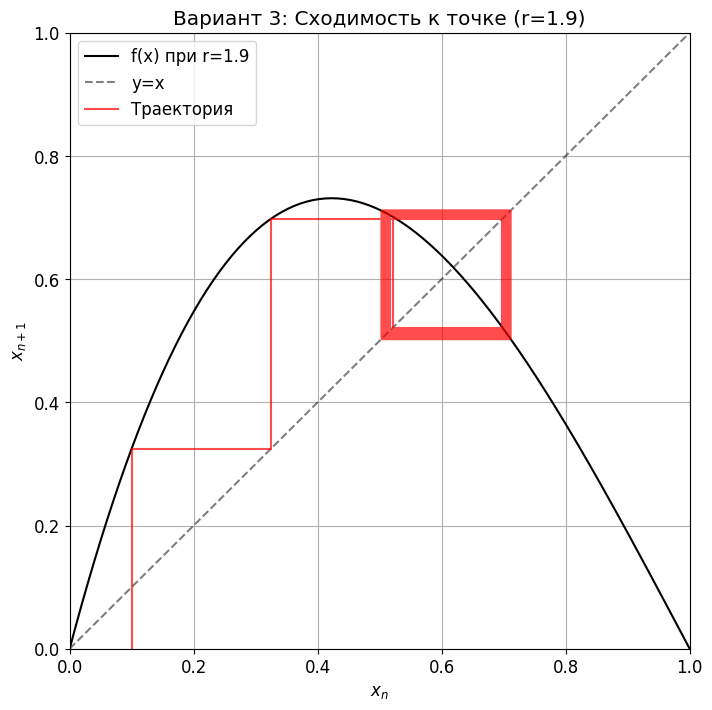

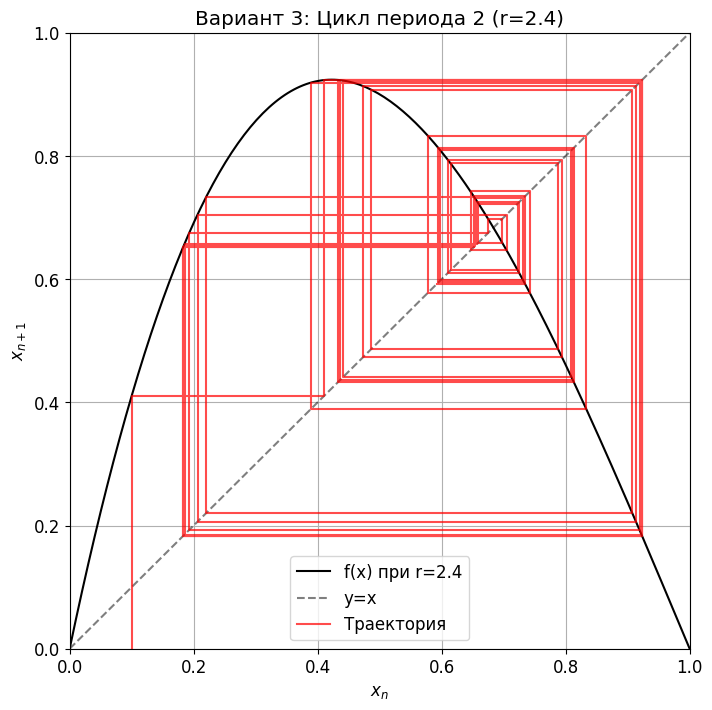

In [18]:
# Задание Hard 1: Написание функции для лестницы Ламерея
def plot_lamerey(map_func, r, x0, n_iter, title="Лестница Ламерея"):
    """Строит лестницу Ламерея для заданного отображения."""
    x = np.linspace(0, 1, 200)
    y = map_func(x, r)
    
    plt.figure(figsize=(8, 8))
    # Кривая отображения и биссектриса
    plt.plot(x, y, 'k', label=f'f(x) при r={r}')
    plt.plot(x, x, 'k--', alpha=0.5, label='y=x')
    
    # Построение лестницы
    x_curr = x0
    
    # Списки координат для построения ломаной линии
    x_coords = [x_curr]
    y_coords = [0]
    
    for _ in range(n_iter):
        # 1. Вертикально к кривой: (x_curr, y_next)
        y_next = map_func(x_curr, r)
        x_coords.append(x_curr)
        y_coords.append(y_next)
        
        # 2. Горизонтально к диагонали: (x_next, y_next)
        x_next = y_next
        x_coords.append(x_next)
        y_coords.append(y_next)
        
        # Обновление текущей точки
        x_curr = x_next
        
    plt.plot(x_coords, y_coords, 'r-', alpha=0.7, label='Траектория')
    plt.title(title)
    plt.xlabel("$x_n$")
    plt.ylabel("$x_{n+1}$")
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.legend()
    plt.grid()
    plt.show()

# Пример вызова для Варианта 3: Сходимость к точке (период 1)
plot_lamerey(variant_map, r=1.9, x0=0.1, n_iter=50, title="Вариант 3: Сходимость к точке (r=1.9)")

# Пример вызова для Варианта 3: Цикл периода 2
plot_lamerey(variant_map, r=2.4, x0=0.1, n_iter=50, title="Вариант 3: Цикл периода 2 (r=2.4)")

### Б. Изменение длины цикла для Варианта 3

**Задание:** Исследуйте, как изменяется длина цикла заданного вариантом отображения $g(x_n)$ с изменением параметра $r$? [cite_start]Есть ли сходства с логистическим отображением? [cite: 121]

1.  **Наблюдаемые изменения:** Как и в случае с классическим отображением, $g(x_n)$ также демонстрирует **каскад бифуркаций удвоения периода** с ростом $r$:
    * До $r=0.5$: Сходимость к $x^*=0$ (период $m=1$).
    * $r \in (0.5; r_{бифуркации})$: Сходимость к ненулевой точке (период $m=1$).
    * С ростом $r$: Происходит удвоение периода $1 \to 2 \to 4 \to \dots$, после чего наступает хаос.
2.  **Сходства:**
    * **Наличие каскада удвоения периода** с последующим переходом к хаосу (дерево Фейгенбаума).
    * **Унимодальная форма** функции $g(x)$ на интервале $(0, 1)$, которая является ключевым фактором для возникновения каскада удвоения.
3.  **Различия:**
    * **Точки бифуркации** ($r$) смещены. Например, потеря устойчивости $x^*=0$ происходит при $r=0.5$ (вместо $r=1$ для $f(x)$).
    * Максимальное значение функции $g(x)$ на интервале $(0, 1)$ меньше, чем у $f(x)$, что влияет на границы перехода к хаосу.

# Часть 4: Expert Level (Глубокий анализ хаоса)

## 1. Устойчивость неподвижной точки $x^{*} = 0$ (Задание Expert 1)

**Задание:** Найти границы параметра $r$, при котором точка $x^{*}=0$ является устойчивой/неустойчивой.

### А. Аналитический расчет

Согласно анализу, проведенному в части Normal Level, устойчивость неподвижной точки $x^{*}=0$ определяется модулем производной отображения $g(x)$ в этой точке: $|g'(0)|$.

Для нашего отображения $g(x) = r x (1 - x) (2 - x)$ мы получили:
$$g'(x) = r (3x^2 - 6x + 2)$$
$$g'(0) = 2r$$

### Б. Границы устойчивости

Применяем критерий устойчивости:
1.  **Устойчивость:** Точка устойчива при $|g'(0)| < 1 \Rightarrow |2r| < 1$.
    $$\text{Нижняя граница } r \in [0, 0.5)$$
2.  **Неустойчивость:** Точка неустойчива при $|g'(0)| > 1 \Rightarrow |2r| > 1$.
    $$\text{Верхняя граница } r > 0.5$$

**Вывод:** Точка $x^{*}=0$ является **устойчивой** при $r \in [0, 0.5)$ и становится **неустойчивой** при $r > 0.5$. В точке **$r_{1}=0.5$** происходит первая **бифуркация** (бифуркация типа "вилка").

---

## 2. Бифуркационная диаграмма (Задания Expert 2 и 3)

### А. Построение и интерпретация

**Бифуркационная диаграмма** — это графическое представление устойчивых состояний системы (аттракторов) в зависимости от управляющего параметра $r$. Для ее построения мы отбрасываем первые $N_{skip}$ итераций (переходный процесс) и фиксируем последующие $N_{iter}$ значений $x_n$, которые составляют установившийся режим.

### Б. Анализ диаграммы (ожидаемые результаты)



1.  **Зона устойчивости $x^*=0$ ($r < 0.5$):** Диаграмма показывает одну ветвь, лежащую на оси $x=0$, что подтверждает наш аналитический вывод.
2.  **Каскад удвоения периода:** После потери устойчивости при $r=0.5$ начинается каскад бифуркаций:
    * $1 \to 2$
    * $2 \to 4$
    * $4 \to 8 \to \dots$
    Этот каскад быстро приводит систему к **хаотическому режиму** при $r_{\infty} \approx 2.5$.

### В. Сходства и различия с логистическим отображением

| Признак | Логистическое отображение $f(x)$ | Вариант 3 $g(x)$ |
| :--- | :--- | :--- |
| **Сходство** | Универсальный сценарий перехода к хаосу — **каскад удвоения периода (Фейгенбаум)**. |
| **Различие 1** | Первая бифуркация $0 \to x^* \neq 0$ происходит при $r=1$. | Первая бифуркация $0 \to x^* \neq 0$ происходит при **$r=0.5$**. |
| **Различие 2** | Переход к хаосу ($r_{\infty}$) происходит при $r \approx 3.5699$. | Переход к хаосу ($r_{\infty}$) происходит при **$r \approx 2.5$** (численная оценка). |
| **Различие 3** | Максимальное значение $r$ до выхода из $[0, 1]$ равно 4. | Расходимость траекторий (выход из $[0, 1]$) происходит при меньших $r$. |

### Г. Визуализация окон периодичности (Задание Expert 3)

В хаотической области (при $r > r_{\infty}$), диаграмма не представляет собой сплошного "облака" точек. Мы видим узкие **окна периодичности** (вертикальные полосы, где ветви снова становятся тонкими и упорядоченными).
Наиболее заметное из них — **окно периода 3**, которое является ключевым признаком в теории хаоса.

---

## 3. Бонус: Связь цикла периода 3 и хаоса

**Задание:** Исследуйте: как связано наличие цикла с периодом 3 с хаотичностью системы?

### А. Теорема Шарковского (1964)

Теорема устанавливает строгий порядок, в котором появляются циклы с разными периодами в одномерных отображениях.
Если отображение $f: \mathbb{R} \to \mathbb{R}$ имеет цикл периода $m$, то оно также имеет циклы всех периодов, которые следуют за $m$ в порядке Шарковского:
$$3 \succ 5 \succ 7 \succ \dots \succ 2\cdot 3 \succ 2\cdot 5 \succ \dots \succ 2^k \cdot 3 \succ \dots \succ 2^k \succ \dots \succ 4 \succ 2 \succ 1$$
Поскольку число 3 стоит первым в этом ряду, наличие цикла периода **3** влечет за собой существование циклов **любого** другого целого периода.

### Б. Теорема Ли-Йорка "Period Three Implies Chaos" (1975)

Эта теорема связывает наличие цикла периода 3 с самим определением хаоса.
**Теорема:** Если непрерывное отображение $f: I \to I$ (где $I$ — интервал) имеет точку, которая является циклом периода 3, то:
1.  Отображение имеет циклы **любого** другого периода $m \in \mathbb{N}$.
2.  Существует **бесконечное, несчетное множество** точек, которые не являются периодическими, но ведут себя **хаотично** (т.е. траектории двух сколь угодно близких точек со временем расходятся экспоненциально).

**Заключение:** Появление цикла периода 3 является **достаточным условием** для возникновения хаотической динамики в одномерной системе.

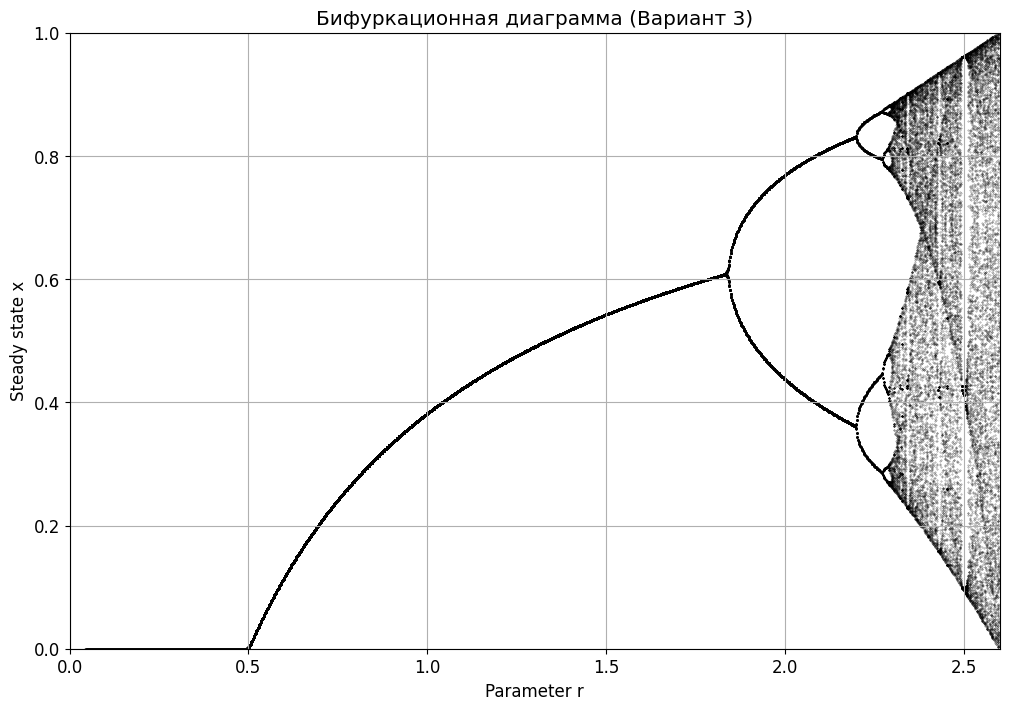

In [19]:
# Задание Expert: Построение бифуркационной диаграммы
def plot_bifurcation(map_func, r_min, r_max, r_step, n_skip, n_iter, title):
    r_values = []
    x_values = []
    
    # Генерируем диапазон r
    # Уменьшим шаг для повышения детализации и качества диаграммы
    r_range = np.arange(r_min, r_max, r_step)
    
    for r in r_range:
        x = 0.5 # Произвольная начальная точка
        # 1. Пропускаем переходный процесс (transient)
        for _ in range(n_skip):
            x = map_func(x, r)
            
        # 2. Записываем установившийся режим (последние N значений)
        for _ in range(n_iter):
            x = map_func(x, r)
            
            # Добавляем r и x в списки ТОЛЬКО, если x в интервале (0, 1)
            # Это исключает расходящиеся траектории (которые ушли в бесконечность или < 0)
            if 0 < x < 1:
                r_values.append(r)
                x_values.append(x)
            else:
                # Оптимизация: если траектория ушла за пределы [0, 1],
                # она расходится, и мы прекращаем итерации для этого r.
                break 
            
    plt.figure(figsize=(12, 8))
    plt.scatter(r_values, x_values, s=0.1, c='black', alpha=0.5) 
    plt.title(title)
    plt.xlabel("Parameter r")
    plt.ylabel("Steady state x")
    plt.xlim(r_min, r_max)
    plt.ylim(0, 1) # Фокус на рабочем интервале
    plt.grid()
    plt.show()

# Вызов функции для Варианта 3
# r меняем до 2.6 (примерная граница хаоса/расходимости)
plot_bifurcation(variant_map, 0, 2.6, 0.002, 300, 150, "Бифуркационная диаграмма (Вариант 3)")